In [1]:
library(dplyr)
library(ggplot2)
options(warn = (-1), message = (-1))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
combinations <- expand.grid(c("MT", "SD", "SHA256"),
                            c("pi", "fykd"))

rawdatafiles <- list.files("../rawdata/")

res <- lapply(1:nrow(combinations), function(index){
  filename <- paste0(combinations[index, 1],
                     "_derangements_", combinations[index, 2], "_n10.csv")
  if(!(filename %in% rawdatafiles)){ return()}
  
  tmp <- read.csv(paste0("../rawdata/", filename), header = TRUE)
  tmp$PRNG <- rep(combinations[index, 1], nrow(tmp))
  tmp$algorithm <- rep(combinations[index, 2], nrow(tmp))
  return(tmp)
})
res <- do.call(rbind, res)

In [5]:
head(res)
str(res)

prng,algorithm,seed,decision,LR,pvalue,steps,PRNG
MT,pi,739828299,None,9.535467e-322,1,10000000,MT
MT,pi,3802979302,None,1.086944e-322,1,10000000,MT
MT,pi,2488119888,None,5.434722e-323,1,10000000,MT
MT,pi,2813529707,None,4.940656e-323,1,10000000,MT
MT,pi,564698376,None,5.434722e-323,1,10000000,MT
MT,pi,2114313936,None,4.446591e-323,1,10000000,MT


'data.frame':	2000 obs. of  8 variables:
 $ prng     : Factor w/ 1 level "MT": 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm: Factor w/ 2 levels "pi","fykd": 1 1 1 1 1 1 1 1 1 1 ...
 $ seed     : num  7.40e+08 3.80e+09 2.49e+09 2.81e+09 5.65e+08 ...
 $ decision : Factor w/ 2 levels "1","None": 2 2 2 2 2 2 2 2 2 2 ...
 $ LR       : num  9.54e-322 1.09e-322 5.43e-323 4.94e-323 5.43e-323 ...
 $ pvalue   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ steps    : int  10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 ...
 $ PRNG     : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
res %>% group_by(PRNG, algorithm) %>% summarise("Rejection rate" = mean(decision == "1"))

PRNG,algorithm,Rejection rate
MT,pi,0.044
MT,fykd,0.000


In [7]:
rejects <- res %>% filter(decision != "None")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


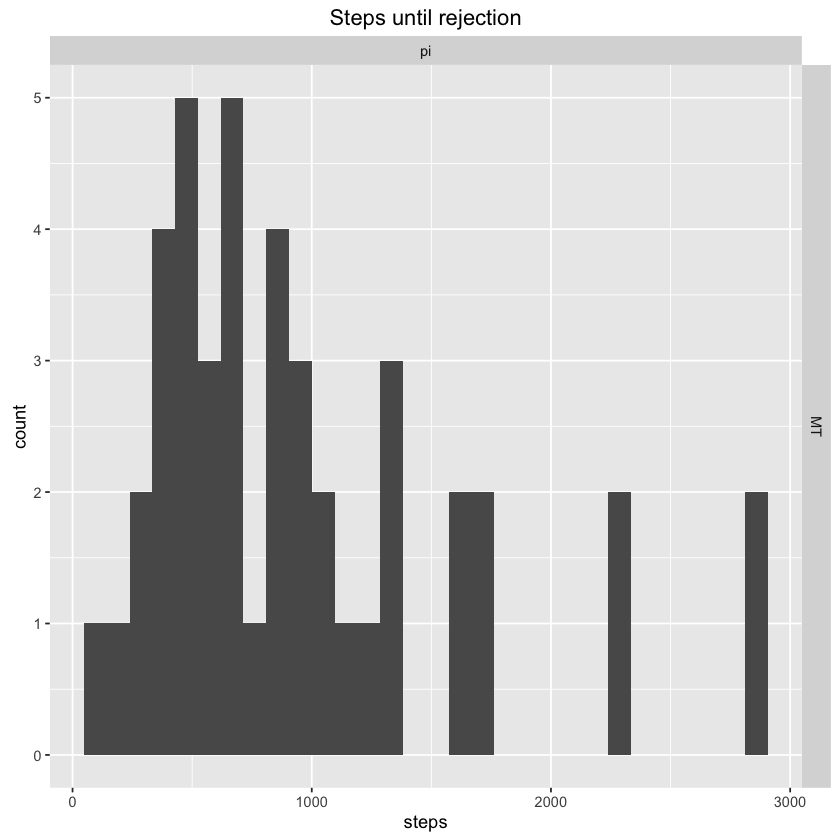

In [8]:
rejects %>% 
    ggplot(aes(steps)) + 
    geom_histogram() + 
    facet_grid(PRNG~algorithm) +
    ggtitle("Steps until rejection")